<a href="https://www.kaggle.com/code/hossamrizk/linear-regression-with-pytorch-for-beginners?scriptVersionId=149250247" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')
df_train.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
df_test = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
df_test.head(5)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [4]:
df_train.isnull().sum().any()

True

In [5]:
df_train=df_train.dropna()

In [6]:
df_test.isnull().sum().any()

False

In [7]:
x_train = df_train.drop(["x"],axis=1)
y_train = df_train[["y"]]
x_test = df_test.drop(["x"],axis=1)
y_test = df_test[["y"]]

In [8]:
df_train.shape

(699, 2)

In [9]:
df_test.shape

(300, 2)

In [10]:
x_train.shape

(699, 1)

In [11]:
x_test.shape

(300, 1)

In [12]:
y_train.shape

(699, 1)

In [13]:
y_test.shape

(300, 1)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [15]:
x_train_np = np.array(x_train,dtype=np.float32)
y_train_np = np.array(y_train,dtype=np.float32)
inputs = torch.from_numpy(x_train_np)
targets = torch.from_numpy(y_train_np)

In [16]:
# features, input shape for first layer = 6
n_samples, n_features = x_train.shape
input_size = n_features
output_size = 1

In [17]:
input_dim = 1
output_dim = 1
learning_rate = 0.001

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([699, 2])) that is different to the input size (torch.Size([699, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Loss: 2011.5416
Epoch [20/1000], Loss: 1909.0258
Epoch [30/1000], Loss: 1809.9664
Epoch [40/1000], Loss: 1714.5536
Epoch [50/1000], Loss: 1622.8573
Epoch [60/1000], Loss: 1534.8657
Epoch [70/1000], Loss: 1450.5244
Epoch [80/1000], Loss: 1369.7549
Epoch [90/1000], Loss: 1292.4702
Epoch [100/1000], Loss: 1218.5781
Epoch [110/1000], Loss: 1147.9868
Epoch [120/1000], Loss: 1080.6014
Epoch [130/1000], Loss: 1016.3288
Epoch [140/1000], Loss: 955.0760
Epoch [150/1000], Loss: 896.7502
Epoch [160/1000], Loss: 841.2593
Epoch [170/1000], Loss: 788.5113
Epoch [180/1000], Loss: 738.4150
Epoch [190/1000], Loss: 690.8813
Epoch [200/1000], Loss: 645.8198
Epoch [210/1000], Loss: 603.1424
Epoch [220/1000], Loss: 562.7615
Epoch [230/1000], Loss: 524.5903
Epoch [240/1000], Loss: 488.5442
Epoch [250/1000], Loss: 454.5386
Epoch [260/1000], Loss: 422.4908
Epoch [270/1000], Loss: 392.3191
Epoch [280/1000], Loss: 363.9438
Epoch [290/1000], Loss: 337.2860
Epoch [300/1000], Loss: 312.2691
Epoch 

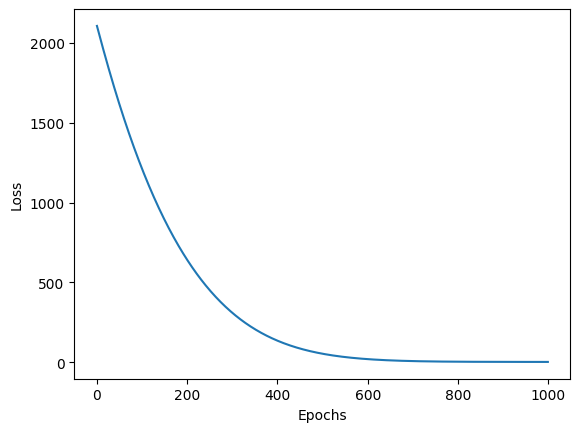

In [18]:
x_train = torch.tensor(df_train.values, dtype=torch.float32)
y_train = torch.tensor(df_train.values, dtype=torch.float32)

n_samples, n_features = x_train.shape[0], x_train.shape[1]
input_size = n_features
output_size = 1

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression(input_size, output_size)
mse = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adjust the learning rate

loss_list = []
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    outputs = model(x_train)
    loss = mse(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss.item())

    if (epoch + 1) % 10== 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(epochs), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
